# SUPERSTORE SALES ANALYSIS

## Data Source
For this project, I leveraged a dataset from Kaggle, specifically the "Superstore Sales Dataset" by Rohit Sahoo. This dataset contains information regarding a retail data for 4 years (2015-2018).

## Problem Statement
In the retail industry, understanding sales, customer behavior and product trends is essential for businesses striving to optimize their operations and enhance customer satisfaction. This dataset focus on online retail transactions, presents an opportunity to uncover critical aspects influencing business performance.

## Objective
The following are business related questions to our data:

1. What was the best month for sales? How much was earned that month?
2. Top 10 states sold the most products?
3. At what time do we have the highest sales?
4. Are there certain times the number of items sold peaks or dip significantly? 
5. What top 10 product sold the most?

## Data Preparation

In [1]:
#Loading libraries
library(janitor)
library(lubridate)
library(tidyverse)
library(ggplot2)
library(scales)
library(maps)
library(repr)


Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr   1.1.4     ✔ readr   2.1.4
✔ forcats 1.0.0     ✔ stringr 1.5.1
✔ ggplot2 3.4.4     ✔ tibble  3.2.1
✔ purrr   1.0.2     ✔ tidyr   1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor



Attaching package: ‘maps’


The following object is masked from ‘package:purrr’:

    map




In [2]:
#Loading the data
Data <- read.csv("/kaggle/input/sales-forecasting/train.csv")
head(Data)

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Country,City,State,Postal.Code,Region,Product.ID,Category,Sub.Category,Product.Name,Sales
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
1,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
2,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back",731.9400
3,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters by Universal,14.6200
4,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
5,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
6,6,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-FU-10001487,Furniture,Furnishings,"Eldon Expressions Wood and Plastic Desk Accessories, Cherry Wood",48.8600


## Data Cleaning

In [3]:
#Changing column names                 
Data <- clean_names(Data)
colnames(Data)

[1] "row_id"        "order_id"      "order_date"    "ship_date"    
 [5] "ship_mode"     "customer_id"   "customer_name" "segment"      
 [9] "country"       "city"          "state"         "postal_code"  
[13] "region"        "product_id"    "category"      "sub_category" 
[17] "product_name"  "sales"

In [4]:
#Checking data types
str(Data)
#Changing data types for order_date and ship_date columns
Data$order_date <- as.Date(Data$order_date, '%d/%m/%Y')
Data$ship_date <- as.Date(Data$ship_date, '%d/%m/%Y')
str(Data)

'data.frame':	9800 obs. of  18 variables:
 $ row_id       : int  1 2 3 4 5 6 7 8 9 10 ...
 $ order_id     : chr  "CA-2017-152156" "CA-2017-152156" "CA-2017-138688" "US-2016-108966" ...
 $ order_date   : chr  "08/11/2017" "08/11/2017" "12/06/2017" "11/10/2016" ...
 $ ship_date    : chr  "11/11/2017" "11/11/2017" "16/06/2017" "18/10/2016" ...
 $ ship_mode    : chr  "Second Class" "Second Class" "Second Class" "Standard Class" ...
 $ customer_id  : chr  "CG-12520" "CG-12520" "DV-13045" "SO-20335" ...
 $ customer_name: chr  "Claire Gute" "Claire Gute" "Darrin Van Huff" "Sean O'Donnell" ...
 $ segment      : chr  "Consumer" "Consumer" "Corporate" "Consumer" ...
 $ country      : chr  "United States" "United States" "United States" "United States" ...
 $ city         : chr  "Henderson" "Henderson" "Los Angeles" "Fort Lauderdale" ...
 $ state        : chr  "Kentucky" "Kentucky" "California" "Florida" ...
 $ postal_code  : int  42420 42420 90036 33311 33311 90032 90032 90032 90032 90032 ...
 $

In [5]:
#Checking for null values
sum(is.na(Data))
#Where are the null values
sapply(Data, function(x)which(is.na(x)))
#Highlight the rows with null values
null_values <- Data[c(2235, 5275, 8799, 9147, 9148, 9149, 9387, 9388, 9389, 9390, 9742),]
null_values
#The null values are the Postal Code for Vermont, Burlington, United States.
#Replacing the null with the correct Postal Code of Burlington city in Vermont state ; 05401-05408
Data$postal_code <- replace_na(Data$postal_code,05401)

[1] 11

$row_id
integer(0)

$order_id
integer(0)

$order_date
integer(0)

$ship_date
integer(0)

$ship_mode
integer(0)

$customer_id
integer(0)

$customer_name
integer(0)

$segment
integer(0)

$country
integer(0)

$city
integer(0)

$state
integer(0)

$postal_code
 [1] 2235 5275 8799 9147 9148 9149 9387 9388 9389 9390 9742

$region
integer(0)

$product_id
integer(0)

$category
integer(0)

$sub_category
integer(0)

$product_name
integer(0)

$sales
integer(0)

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sales
,<int>,<chr>,<date>,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
2235,2235,CA-2018-104066,2018-12-05,2018-12-10,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NA,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5275,5275,CA-2016-162887,2016-11-07,2016-11-09,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NA,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8799,8799,US-2017-150140,2017-04-06,2017-04-10,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NA,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9147,9147,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NA,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9148,9148,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NA,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9149,9149,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NA,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9387,9387,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NA,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9388,9388,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NA,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9389,9389,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NA,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94


In [6]:
#Checking for duplicate rows
sum(duplicated(Data))

[1] 0

In [7]:
#Attach the data
attach(Data)

## Data Exploration
### Order Analysis

In [8]:
#Total number of orders:
length(order_id)
#Total number of unique orders:
length(unique(order_id))

[1] 9800

[1] 4922

In [9]:
#Order sales
sales_by_order_id <- aggregate(sales~order_id, data = Data, sum) %>%
  arrange(desc(sales))
#Top 5 orders by sum
top_orders <- head(sales_by_order_id, 5)
top_orders
#Bottom 5 orders by  sum
bottom_orders <- tail(sales_by_order_id, 5)
bottom_orders

,order_id,sales
,<chr>,<dbl>
1,CA-2015-145317,23661.23
2,CA-2017-118689,18336.74
3,CA-2018-140151,14052.48
4,CA-2018-127180,13716.46
5,CA-2015-139892,10539.90


,order_id,sales
,<chr>,<dbl>
4918,US-2018-100209,1.080
4919,US-2015-152723,0.876
4920,CA-2015-112403,0.852
4921,CA-2017-168361,0.836
4922,CA-2018-124114,0.556


**Insight:**
```
1. A total of 9800 orders and 4922 unique orders were made from Jan 2015 to Dec 2018
2. Order 'CA-2015-145317' leads in sales with $23661.23
3. Order 'CA-2018-124114' has the lowest sales with $0.556.
```

### Category and Sub-category Analysis

In [10]:
#Main category sales
category_sum <- aggregate(sales~category, data = Data, sum) %>%
  arrange(desc(sales))
category_sum
#Sub-category sales
sub_category_sum <- aggregate(sales~sub_category, data = Data, sum) %>%
  arrange(desc(sales))
sub_category_sum

category,sales
<chr>,<dbl>
Technology,827455.9
Furniture,728658.6
Office Supplies,705422.3


sub_category,sales
<chr>,<dbl>
Phones,327782.45
Chairs,322822.73
Storage,219343.39
Tables,202810.63
Binders,200028.79
Machines,189238.63
Accessories,164186.70
Copiers,146248.09
Bookcases,113813.20


In [11]:
#Mean of sales by categories:
round(sum(sales)/length(unique(category)),2)
#Mean of sales by sub-categories:
round(sum(sales)/length(unique(sub_category)),2)

[1] 753845.6

[1] 133031.6

In [12]:
#Table showing sales by Main and Sub-category
table_1 <- Data %>%
  group_by(category, sub_category) %>%
  summarise(sales = sum(sales))
table_1

`summarise()` has grouped output by 'category'. You can override using the
`.groups` argument.


category,sub_category,sales
<chr>,<chr>,<dbl>
Furniture,Bookcases,113813.20
Furniture,Chairs,322822.73
Furniture,Furnishings,89212.02
Furniture,Tables,202810.63
Office Supplies,Appliances,104618.40
Office Supplies,Art,26705.41
Office Supplies,Binders,200028.79
Office Supplies,Envelopes,16128.05
Office Supplies,Fasteners,3001.96


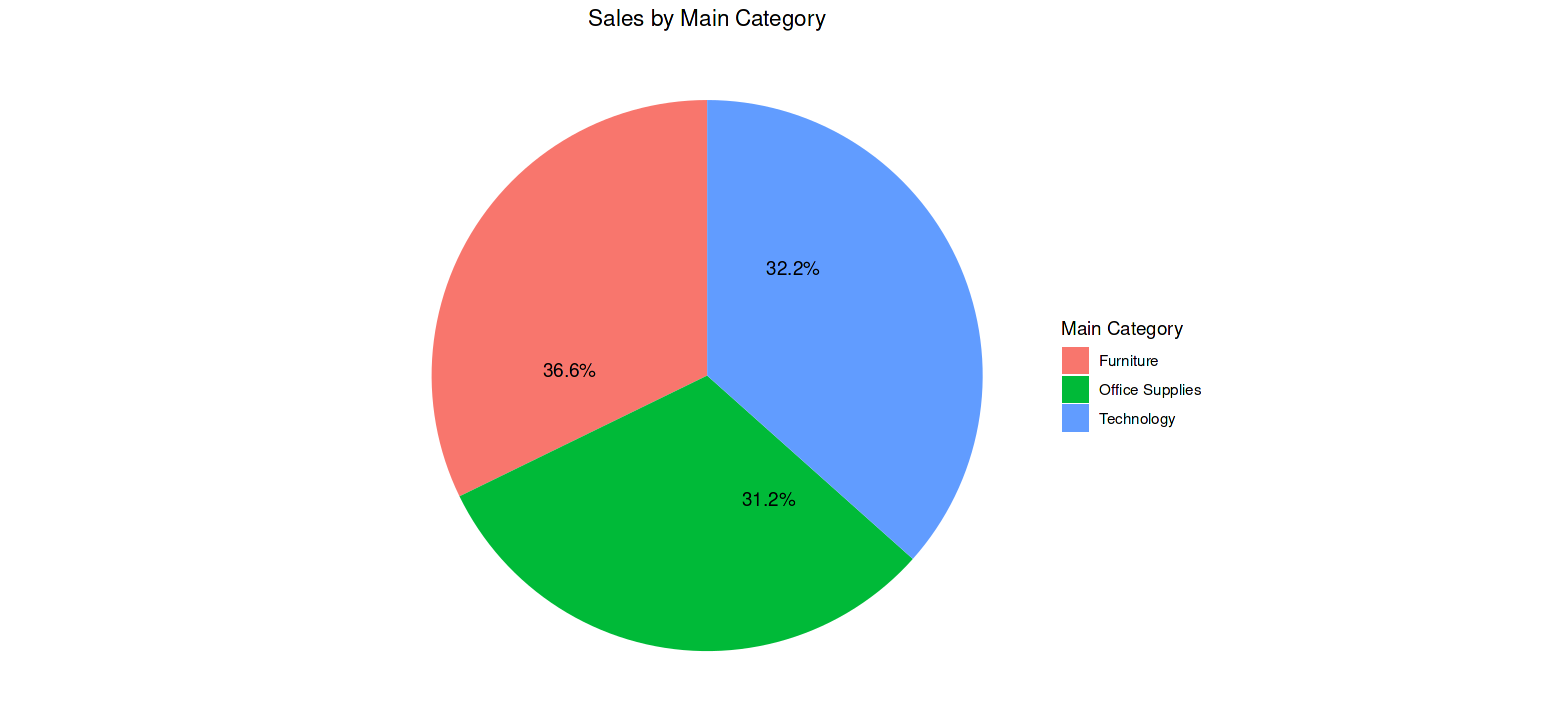

In [13]:
#Pie plot
options(repr.plot.width = 13, repr.plot.height = 6)
table_1_2 <- Data %>%
  group_by(category) %>%
  summarise(sales = sum(sales))
ggplot(table_1_2, aes(x="", y= sales, fill = category)) +
  geom_col() +
  labs(title = "Sales by Main Category", fill = "Main Category") +
  coord_polar(theta = "y", start = 0) +
  theme_void() +
  geom_text(aes(
    y = sales / length(unique(category)) + c(0, cumsum(sales)[-length(sales)]),
    label = percent(sales/sum(sales))
  )) +
  theme(plot.title = element_text(hjust = 0.5))

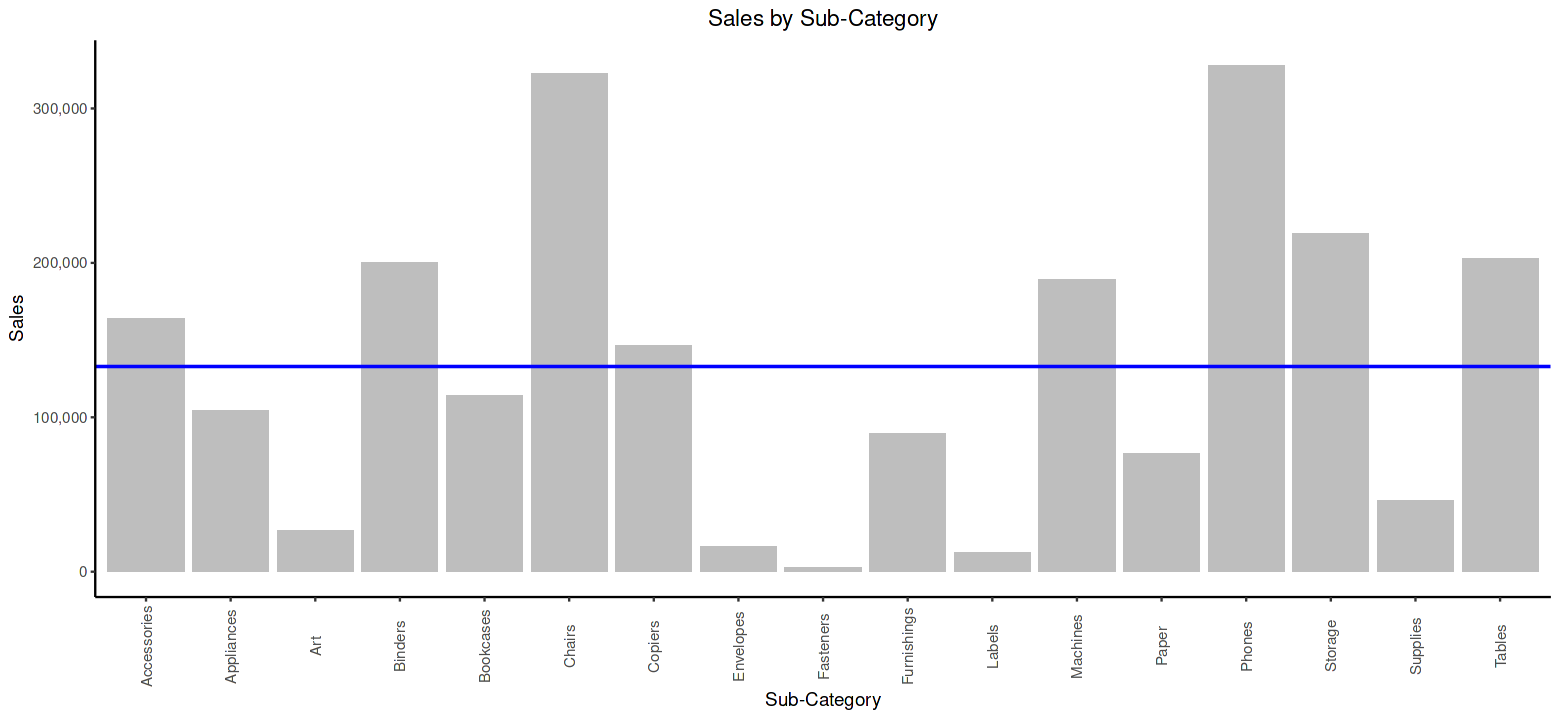

In [14]:
#Sub-category bar plot
ggplot(data = Data, aes(x = sub_category, y = sales)) +
  geom_bar(stat = "identity", fill = "grey") +
  geom_hline(yintercept = sum(sales)/length(unique(sub_category)), color = "blue", lwd = 0.75) +
  scale_y_continuous(labels = comma) +
  labs(title = "Sales by Sub-Category", x = "Sub-Category", y = "Sales") +
  theme_classic() +
  theme(plot.title = element_text(hjust = 0.5), axis.text.x = element_text(angle = 90, vjust = 0.5))

**Insight:**
```
1. In main category, "Technology" has the highest sales with 36.6% and Total Sales of $827455.9
2. In sub-category, "Phones" has the highest sales with 39.61% and Total Sales of $327782.45
3. Out of 17 only 8 sub-categories of products had Total Sales above the Average Sales.
```

### Product Analysis

In [15]:
#Product rankings
product_ranking <- Data %>%
  group_by(product_id) %>%
  summarise(total_orders = length(product_id), average_price = mean(sales)) %>%
  arrange(desc(total_orders))
#Top 10 products
top_products <- head(product_ranking, 10)
top_products

product_id,total_orders,average_price
<chr>,<int>,<dbl>
OFF-PA-10001970,19,114.07095
TEC-AC-10003832,18,622.43089
FUR-FU-10004270,16,26.66000
FUR-CH-10002647,15,242.75160
TEC-AC-10002049,15,917.10240
TEC-AC-10003628,15,93.96867
FUR-CH-10001146,14,160.51257
FUR-CH-10002880,14,388.29700
FUR-CH-10003774,14,297.63457


**Insight:**
```
1. The most ordered product is 'OFF-PA-10001970' with 19 orders and Average Price of $114.07
```

### Date Analysis

In [16]:
#Total sales by year
year_sales <- Data %>%
  group_by(year = year(order_date)) %>%
  summarize(total_sales = sum(sales)) %>%
  mutate(rate  = (total_sales - dplyr::lag(total_sales))/dplyr::lag(total_sales)*100)
year_sales

year,total_sales,rate
<dbl>,<dbl>,<dbl>
2015,479856.2,NA
2016,459436.0,-4.255484
2017,600192.6,30.636812
2018,722052.0,20.303396


In [17]:
#Average sales by month  and total orders over the years
month_sales <- Data %>%
  group_by(month = month(order_date)) %>%
  summarize(total_orders = length(order_id), average_sales = mean(sales)) %>%
  mutate(average_rate  = (average_sales - dplyr::lag(average_sales))/dplyr::lag(average_sales)*100, 
         orders_rate  = (total_orders - dplyr::lag(total_orders))/dplyr::lag(total_orders)*100)
month_sales

month,total_orders,average_sales,average_rate,orders_rate
<dbl>,<int>,<dbl>,<dbl>,<dbl>
1,366,257.6274,NA,NA
2,297,199.9027,-22.4062569,-18.8524590
3,680,290.5494,45.3453740,128.9562290
4,657,207.4323,-28.6068827,-3.3823529
5,725,212.5334,2.4591850,10.3500761
6,691,211.0529,-0.6966228,-4.6896552
7,697,208.8030,-1.0660167,0.8683068
8,693,227.0071,8.7183196,-0.5738881
9,1354,221.6421,-2.3633637,95.3823954


In [18]:
#Time with highest sales
time_sales <- Data %>%
  group_by(order_date) %>%
  summarize(total_sales = sum(sales)) %>%
  arrange(desc(total_sales))
head(time_sales,3)

order_date,total_sales
<date>,<dbl>
2015-03-18,28106.72
2017-10-02,18452.97
2018-10-22,15158.88


In [19]:
#Time with highest orders
time_orders <- Data %>%
  group_by(order_date) %>%
  summarize(total_orders = length(order_date)) %>%
  arrange(desc(total_orders))
head(time_orders,3)

order_date,total_orders
<date>,<int>
2017-09-05,38
2017-11-10,35
2018-12-01,34


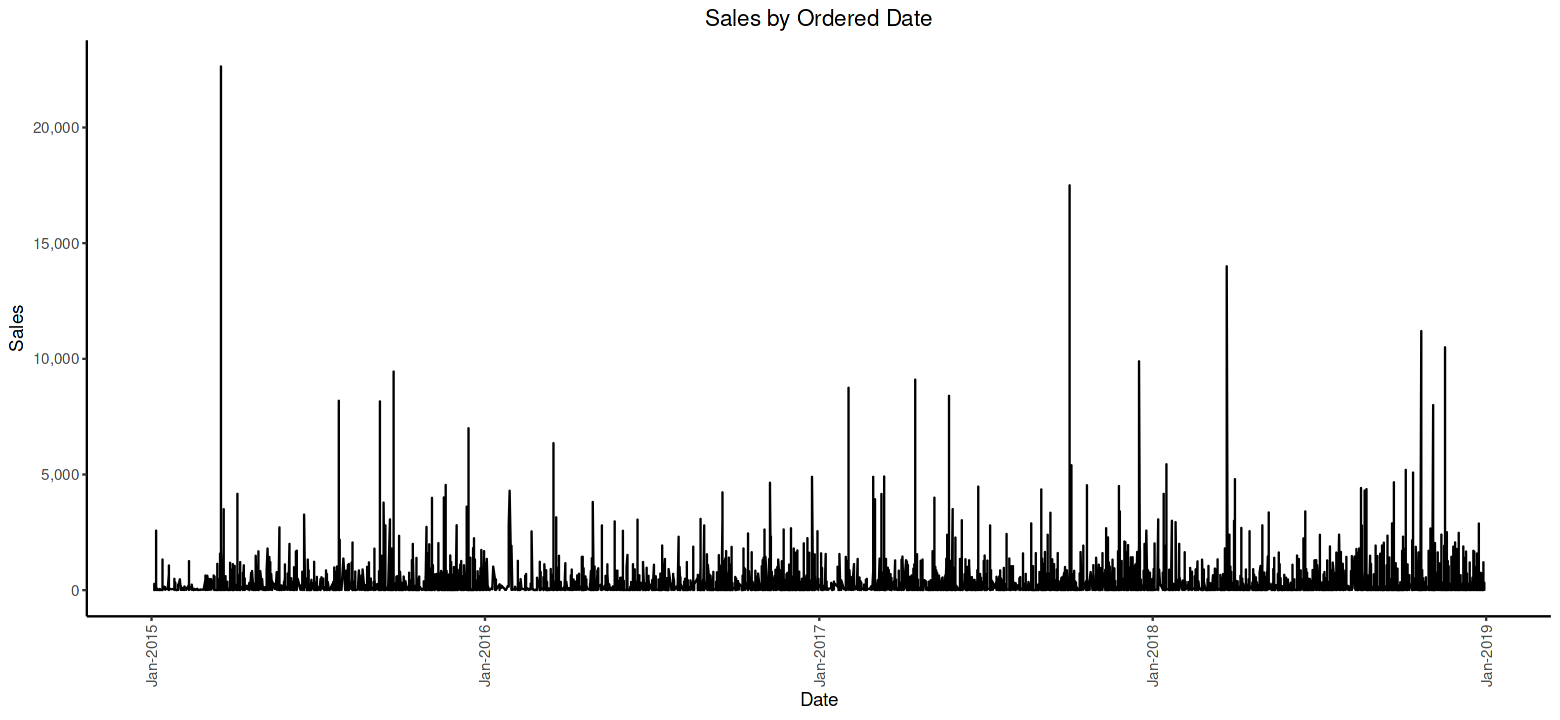

In [20]:
#Plot of sales by ordered date
ggplot(Data, aes(x = order_date, y = sales)) +
  geom_line() +
  scale_y_continuous(labels = comma) +
  scale_x_date(labels = date_format("%b-%Y")) +
  labs(title = "Sales by Ordered Date", x = "Date", y = "Sales") +
  theme_classic() +
  theme(plot.title = element_text(hjust = 0.5), axis.text.x = element_text(angle = 90, vjust = 0.5))

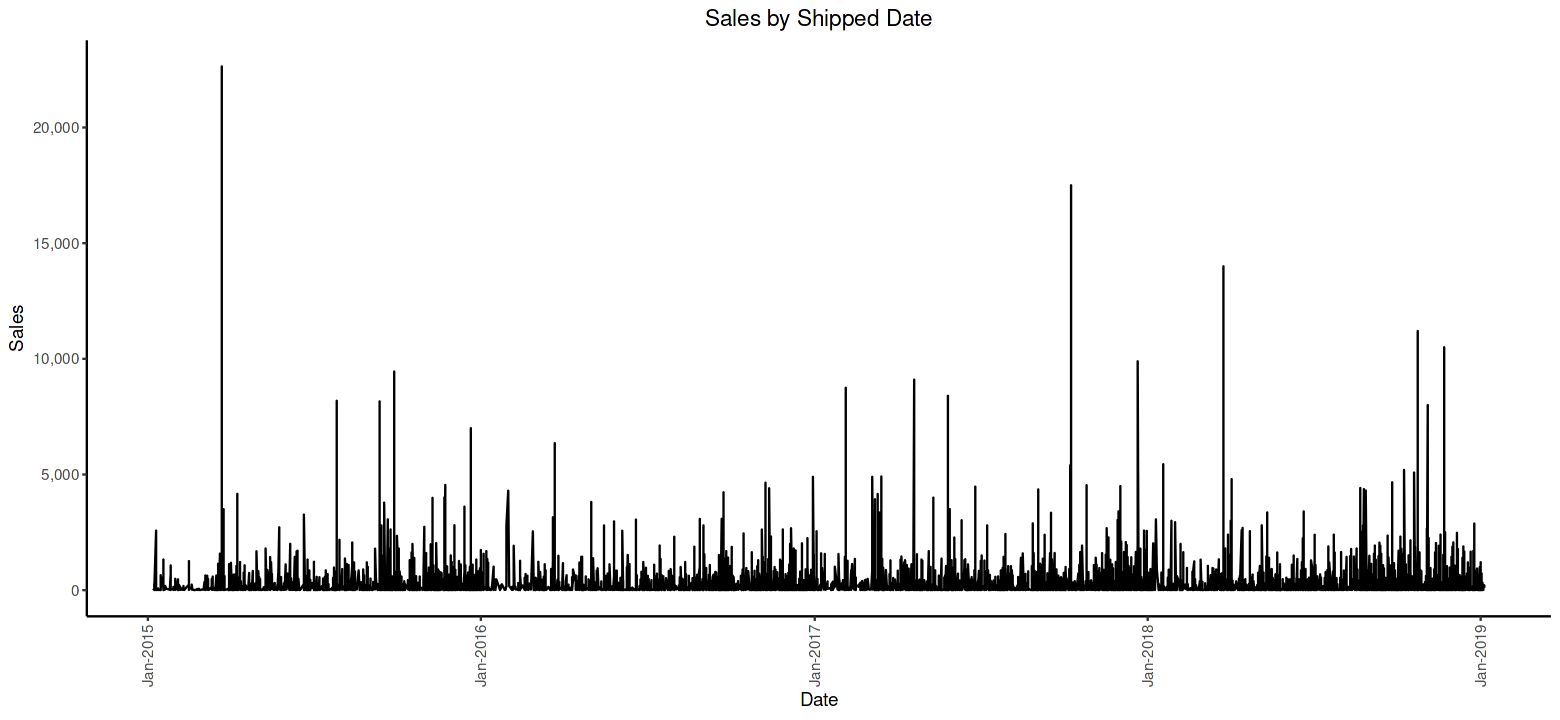

In [21]:
#Plot of sales by shipped date
ggplot(Data, aes(x = ship_date, y = sales)) +
  geom_line() +
  scale_y_continuous(labels = comma) +
  scale_x_date(labels = date_format("%b-%Y")) +
  labs(title = "Sales by Shipped Date", x = "Date", y = "Sales") +
  theme_classic() +
  theme(plot.title = element_text(hjust = 0.5), axis.text.x = element_text(angle = 90, vjust = 0.5))

**Insight:**
```
1. There was significant decrease of 4.26% in sales from 2015 to 2016.
2. In 2018, the highest Total Sales was recorded with $722052 while 2016 had the lowest total sales of $459436.
3. March had the highest Average Sales with $290.55 and February had the lowest Average Sales with $199.90
4. There was a significant increase of 45.35% from February to March.
5. There was a significant decrease of 28.61% from March to April.
6. Over the years, November had the highest total number of orders with 1449.
7. On 18th March 2015, recorded the highest Total Sales.
8. On 5th Sept 2017, recorded the highest number of orders.
```

### Shipping Analysis

In [22]:
#Shipping rankings
shipping_ranking <- Data %>%
  group_by(ship_mode) %>%
  summarise(orders_shipped = length(ship_mode)) %>%
  arrange(desc(orders_shipped))
shipping_ranking

ship_mode,orders_shipped
<chr>,<int>
Standard Class,5859
Second Class,1902
First Class,1501
Same Day,538


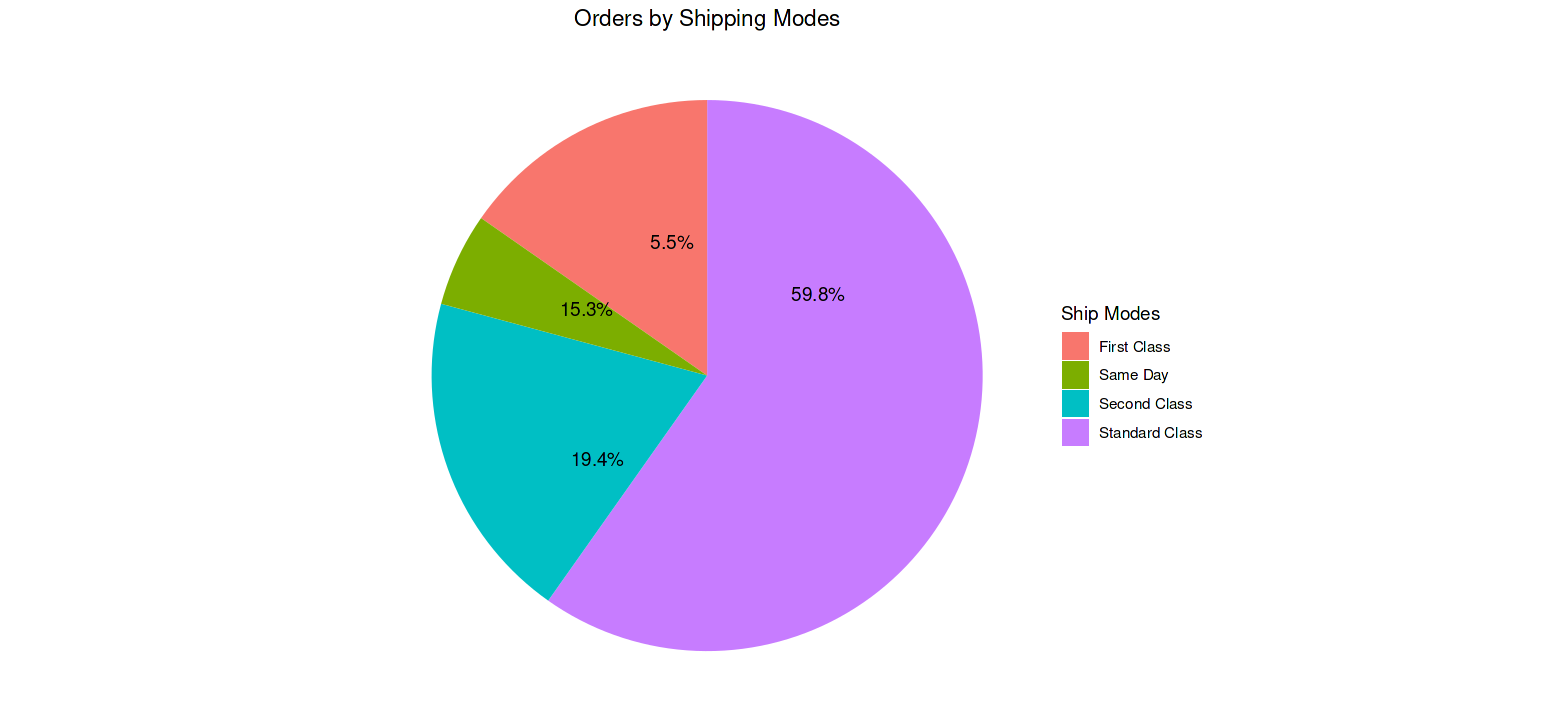

In [23]:
#Plot for ship mode rankings
ggplot(shipping_ranking, aes(x="", y = orders_shipped , fill = ship_mode)) +
  geom_col() +
  labs(title = "Orders by Shipping Modes", fill = "Ship Modes") +
  coord_polar(theta = "y", start = 0) +
  theme_void() +
  geom_text(aes(
    y = orders_shipped / length(unique(ship_mode)) + c(0, cumsum(orders_shipped)[-length(orders_shipped)]),
    label = percent(orders_shipped/sum(orders_shipped))
  )) +
  theme(plot.title = element_text(hjust = 0.5))

**Insight:**
```
1. The most used shipping mode is 'Standard Class' by 59.8% with a count of 5859.
2. The least used shipping mode is 'Same Day' by 5.5% with a count of 538.
```

### Customer Analysis

In [24]:
#Segment sales
segment_sales <- Data %>%
  group_by(segment) %>%
  summarise(total_ordered = length(segment),
            total_sales = sum(sales),
            average_sales = mean(sales)) %>%
  arrange(desc(total_ordered))
segment_sales

segment,total_ordered,total_sales,average_sales
<chr>,<int>,<dbl>,<dbl>
Consumer,5101,1148060.5,225.0658
Corporate,2953,688494.1,233.1507
Home Office,1746,424982.2,243.4033


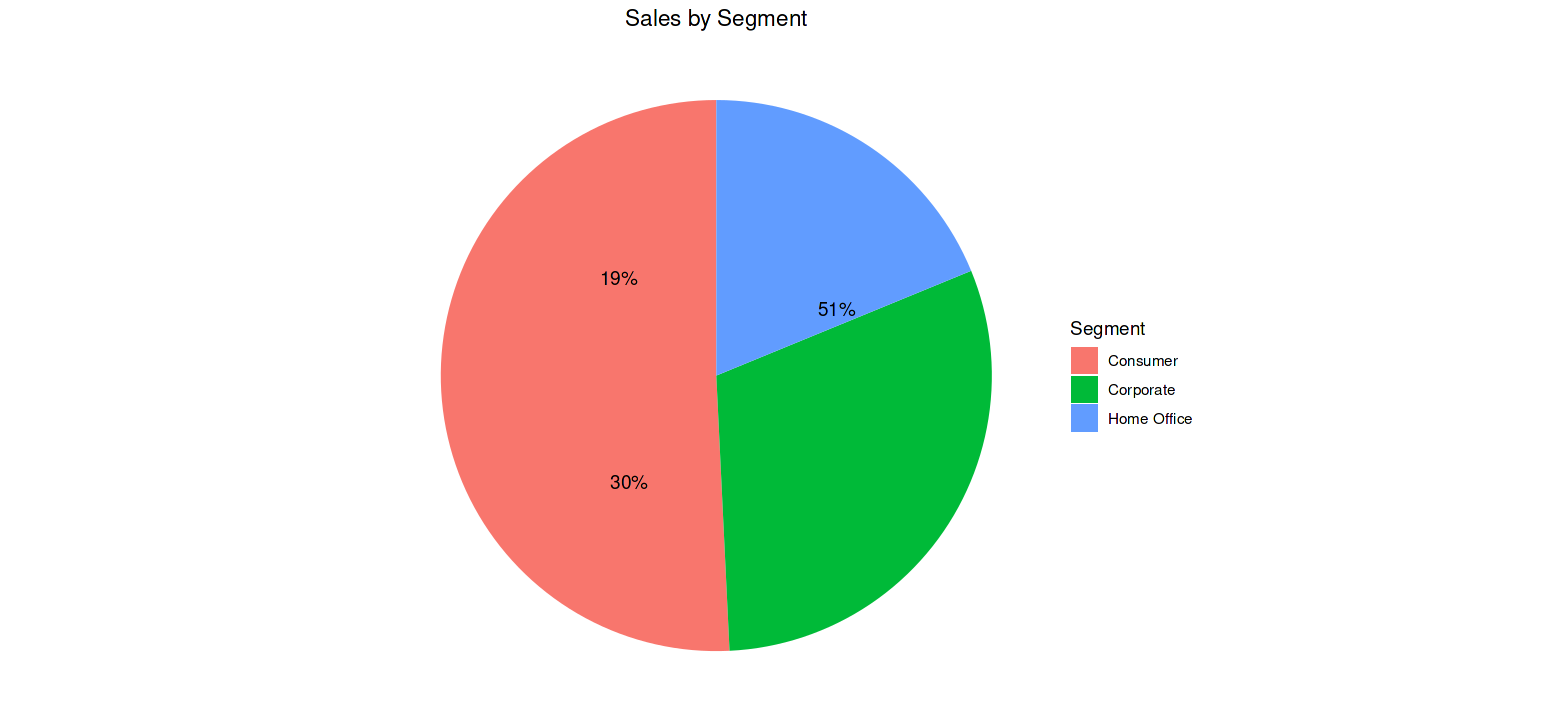

In [25]:
#Plot of segment by sales
ggplot(segment_sales, aes(x="", y = total_sales, fill = segment)) +
  geom_col() +
  labs(title = "Sales by Segment", fill = "Segment") +
  coord_polar(theta = "y", start = 0) +
  theme_void() + 
  geom_text(aes(
    y = total_sales / length(unique(segment)) + c(0, cumsum(total_sales)[-length(total_sales)]),
    label = percent(total_sales/sum(total_sales))
  )) +
  theme(plot.title = element_text(hjust = 0.5))

In [26]:
#Customer rankings
customer_ranking <- Data %>%
  group_by(customer_id) %>%
  summarise(total_ordered = length(customer_id)) %>%
  arrange(desc(total_ordered))
#Top 3 customers
top_customers <- head(customer_ranking, 3)
top_customers

customer_id,total_ordered
<chr>,<int>
WB-21850,35
MA-17560,34
PP-18955,34


**Insight:**
```
1. 'Consumer' customers have the highest number of orders by 5101.
2. 'Consumer' customers generated the highest Total Sales of 51% with $1148060.5 and the lowest Average Sales of $225.07
3. 'Home Office' customers have the highest Average Sales with $243.40
4. The highest number of orders by a customer is 35.
```

### Geographical Analysis

In [27]:
#Region sales
region_sales <- Data %>%
  group_by(region) %>%
  summarise(total_ordered = length(region),
            total_sales = sum(sales),
            average_sales = mean(sales)) %>%
  arrange(desc(total_sales))
region_sales

region,total_ordered,total_sales,average_sales
<chr>,<int>,<dbl>,<dbl>
West,3140,710219.7,226.1846
East,2785,669518.7,240.4017
Central,2277,492646.9,216.3579
South,1598,389151.5,243.5241


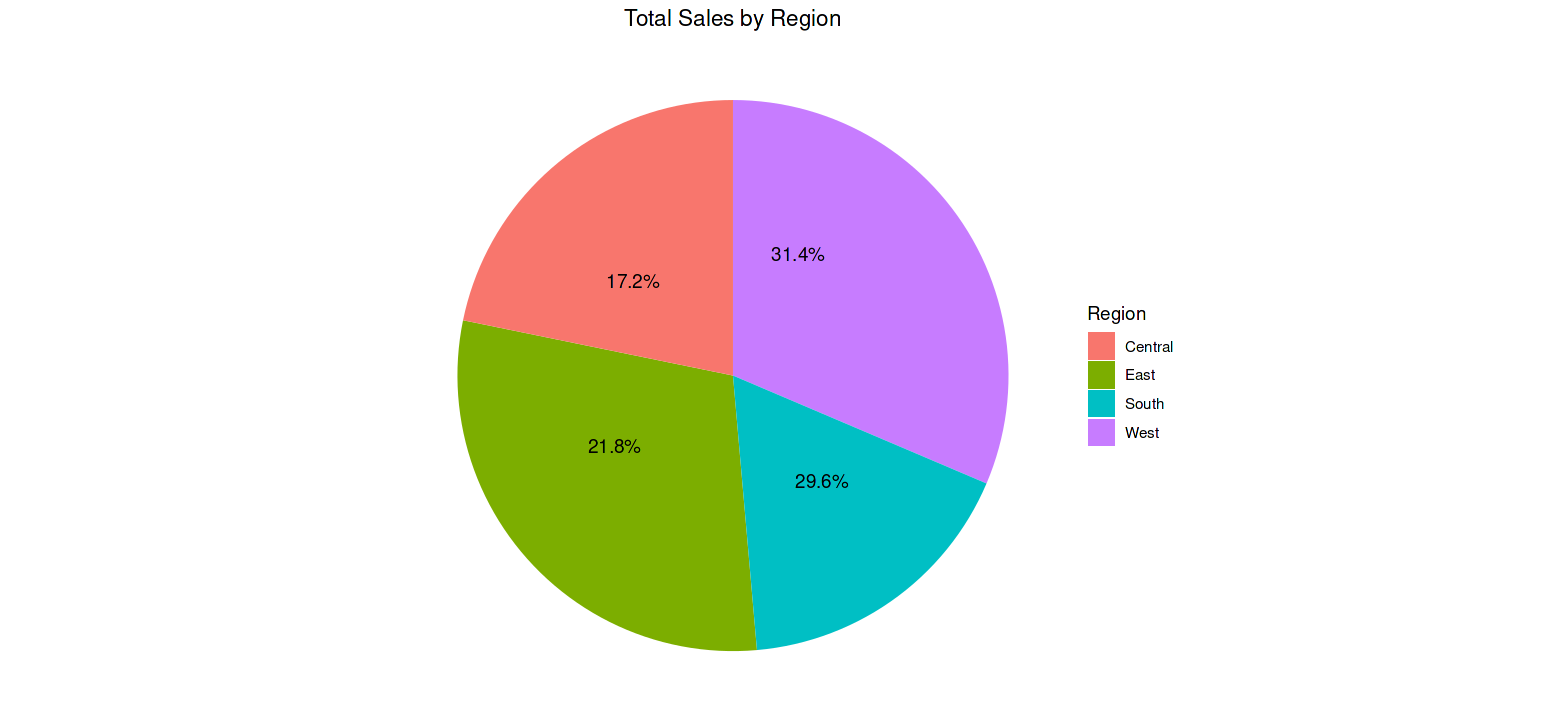

In [28]:
#Plot of region by sales
ggplot(region_sales, aes(x="", y = total_sales, fill = region)) +
  geom_col() +
  labs(title = "Total Sales by Region", fill = "Region") +
  coord_polar(theta = "y", start = 0) +
  theme_void() +
  geom_text(aes(
    y = total_sales / length(unique(region)) + c(0, cumsum(total_sales)[-length(total_sales)]),
    label = percent(total_sales/sum(total_sales))
  )) +
  theme(plot.title = element_text(hjust = 0.5))

In [29]:
#State sales
state_sales <- Data %>%
  group_by(state) %>%
  summarise(total_ordered = length(state),
            total_sales = sum(sales),
            average_sales = mean(sales)) %>%
  arrange(desc(total_sales))
head(state_sales, 10)

state,total_ordered,total_sales,average_sales
<chr>,<int>,<dbl>,<dbl>
California,1946,446306.46,229.3456
New York,1097,306361.15,279.2718
Texas,973,168572.53,173.2503
Washington,504,135206.85,268.2676
Pennsylvania,582,116276.65,199.7881
Florida,373,88436.53,237.0953
Illinois,483,79236.52,164.0508
Michigan,253,76136.07,300.9331
Ohio,454,75130.35,165.4854


In [30]:
#City sales
city_sales <- Data %>%
  group_by(city) %>%
  summarise(total_ordered = length(city),
            total_sales = sum(sales),
            average_sales = mean(sales)) %>%
  arrange(desc(total_sales))
head(city_sales, 5)

city,total_ordered,total_sales,average_sales
<chr>,<int>,<dbl>,<dbl>
New York City,891,252462.5,283.3474
Los Angeles,728,173420.2,238.2145
Seattle,426,116106.3,272.5501
San Francisco,500,109041.1,218.0822
Philadelphia,532,108841.7,204.5898


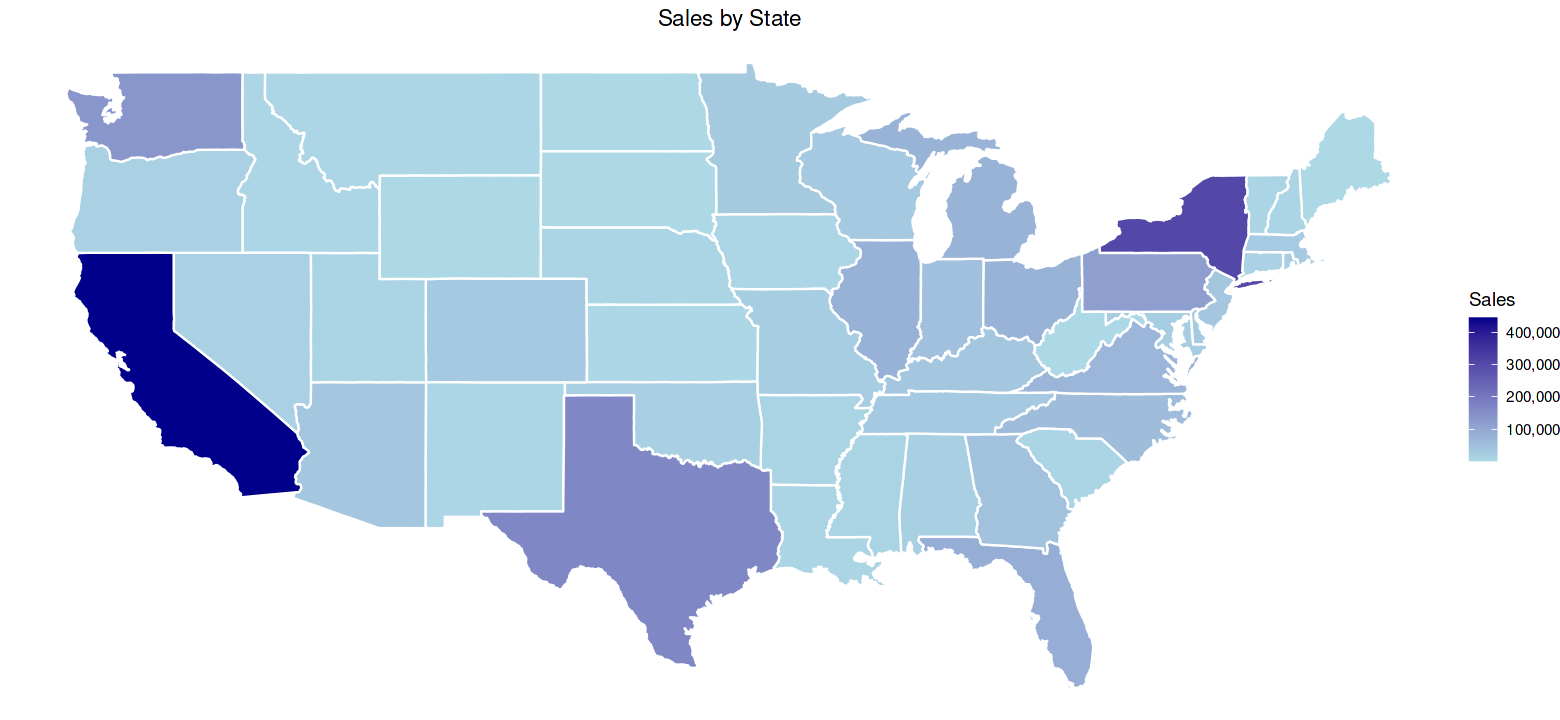

In [31]:
#Mapping by state
state_sales_2 <- Data %>%
  group_by(state) %>%
  summarise(total_sales = sum(sales))
colnames(state_sales_2) <- c("region", "sales")
state_sales_2$region <- tolower(state_sales_2$region)
us_state <- map_data("state")
statemap <- merge(us_state, state_sales_2, by = "region")
ggplot(statemap, aes(long, lat, group = group)) +
  geom_polygon(aes(fill = sales), color = "white") +
  theme_void() +
  scale_fill_continuous(name = "Sales", low = 'lightblue', high = 'darkblue', label = comma) +
  labs(title = "Sales by State") +
  theme(plot.title = element_text(hjust = 0.5))

**Insight:**
```
1. The West region generated the highest Total Sales of $710219.7 that is 31.4% while the South region had the lowest Total Sales of $389151.5 that is 17.2%.
2. The state of California had the highest Total Sales of $446306.46 followed by New York with $306361.15
3. New York City generated the highest Total Sales of $252462.55 and total number of orders is 1946.
```

## Recommendations

1. Show more ads during the months of March and April. Try special promotions or flash sales during these months to get more people interested and make conversions.
2. Consider adding more similar products (Phones) or using similar stategies to sell more things overall.
3. Plan your stock items and staff based on the most popular product and the months when the most people  shop. Make sure you always have available products (especially products that sold the most) and your team is ready to help customers during these times.
4. Leverage high March sales to plan exciting marketing campaigns. Think about special promotions or events that customers will love during this time. 